<a href="https://colab.research.google.com/github/MinJi12345678/Source-Code/blob/main/24_03_26_%EA%B9%80%EB%AF%BC%EC%A7%80_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#패션 EDA

1. 한글 폰트 설치

In [ ]:
# Linux Package Installation
!apt-get -qq -y install fonts-nanum > /dev/null

# Delete Cache
!rm -rf ~/.cache/matplotlib -rf

In [ ]:
import os

os.kill(os.getpid(), 9)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 마이너스 폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 전역폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

2. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = '/content/drive/MyDrive/5조/03. 데이터/2차 전처리 패션 데이터/Fashion_Weather_Data.csv'
df = pd.read_csv(df)

.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565954 entries, 0 to 565953
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Time                  565954 non-null  object 
 1   category_middle_desc  565954 non-null  object 
 2   category_small_desc   565954 non-null  object 
 3   item                  565954 non-null  object 
 4   color                 565954 non-null  object 
 5   material              565954 non-null  object 
 6   sale_price            565954 non-null  int64  
 7   recent_sale_count     565954 non-null  int64  
 8   최고기온                  565954 non-null  float64
 9   최저기온                  565954 non-null  float64
 10  평균기온                  565954 non-null  float64
 11  강수량                   565954 non-null  float64
 12  습도                    565954 non-null  float64
 13  적설                    565954 non-null  float64
 14  체감온도                  565954 non-null  float64
dtype

In [ ]:
df.head(2)

,Time,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
0,2023-01-04,원피스,린넨원피스,롱원피스/나시원피스/프릴원피스/러플원피스,베이지,실크/레이온/린넨,36900,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36
1,2023-01-04,원피스,스퀘어넥원피스,A라인원피스/롱원피스/하객룩원피스/트위드원피스/겨울원피스/스퀘어넥원피스/울원피스,골드/블랙,울/폴리에스터/아크릴,181300,1,8.8,-5.7,0.62,4.0,63.93,33.8,1.36


In [ ]:
# 날짜 열이 있다고 가정하고 해당 열을 인덱스로 설정
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# 9월, 10월, 11월의 데이터만 추출
fall_df = df['2023-09-01':'2023-11-30']

fall_df

,category_middle_desc,category_small_desc,item,color,material,sale_price,recent_sale_count,최고기온,최저기온,평균기온,강수량,습도,적설,체감온도
Time,,,,,,,,,,,,,,
2023-09-06,원피스,롱원피스,맥시원피스/롱원피스/바캉스룩원피스/리넨원피스/어깨끈원피스/여름원피스/리넨나시/나시원...,블랙/베이지,실크/리넨/레이온,33900,1,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,도트원피스/맥시원피스/롱원피스,블랙/화이트,폴리에스터,107640,5,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,맥시원피스/플리츠원피스/롱원피스/봄원피스/여름원피스,블랙,폴리에스터,123240,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,피로연원피스/롱원피스/베이비돌원피스/칼라원피스/하객룩원피스/여름원피스/정장원피스,블랙/네이비/베이지/화이트,폴리에스터,59400,12,32.1,19.8,25.99,0.0,64.89,0.0,28.16
2023-09-06,원피스,롱원피스,빅사이즈원피스/셔츠롱원피스/롱원피스/하객룩원피스/정장원피스,블랙/베이지/아이보리/브라운,폴리에스터,62900,4,32.1,19.8,25.99,0.0,64.89,0.0,28.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,스커트,플레어스커트,하객룩스커트/미니스커트,아이보리/블랙,폴리에스터,19920,2,12.4,-7.1,0.41,0.0,55.93,0.0,0.84
2023-11-29,스커트,H라인스커트,코듀로이스커트,핑크/라이트블루/블랙/화이트/그린/아이보리,코튼,29900,5,12.4,-7.1,0.41,0.0,55.93,0.0,0.84
2023-11-29,스커트,H라인스커트,미니스커트/코듀로이스커트/데일리스커트/겨울스커트/울스커트,핑크/그린/차콜/아이보리/블루,코튼,27900,1,12.4,-7.1,0.41,0.0,55.93,0.0,0.84


In [ ]:
print(df.columns)

Index(['category_middle_desc', 'category_small_desc', 'item', 'color',
       'material', 'sale_price', 'recent_sale_count', '최고기온', '최저기온', '평균기온',
       '강수량', '습도', '적설', '체감온도'],
      dtype='object')


In [ ]:
fall_df[['category_middle_desc']].value_counts()

category_middle_desc
상의                      62430
팬츠                      22463
원피스                     19968
스커트                     16004
아우터                     11505
세트/투피스                    267
dtype: int64

소분류.unique()

In [ ]:
fall_df['category_small_desc'].unique()

array(['롱원피스', '니트원피스', '뷔스티에원피스', '트위드원피스', '미니원피스', '점프슈트', '시폰원피스',
       '셔츠원피스', '플리츠원피스', '데님원피스', '랩원피스', '리넨원피스', '세트/투피스', '스퀘어넥원피스',
       '데님팬츠', '조거팬츠', '슬랙스', '면바지', '코듀로이팬츠', '반바지', '카디건', '재킷', '코트',
       '점퍼', '뷔스티에/베스트', '티셔츠', '블라우스/셔츠', '니트', '롱스커트', '플리츠스커트',
       '플레어스커트', '데님스커트', '머메이드스커트', 'H라인스커트', '미니스커트'], dtype=object)

In [ ]:
fall_df[['category_small_desc']].value_counts()

category_small_desc
티셔츠                    35708
롱원피스                   13429
블라우스/셔츠                13319
롱스커트                   10045
니트                      7033
면바지                     7013
뷔스티에/베스트                6370
슬랙스                     5187
점퍼                      4805
조거팬츠                    4108
재킷                      3576
반바지                     3276
플레어스커트                  2620
미니원피스                   1856
데님팬츠                    1845
카디건                     1695
H라인스커트                  1657
코트                      1429
니트원피스                   1339
플리츠스커트                  1144
코듀로이팬츠                  1034
뷔스티에원피스                  863
점프슈트                     597
셔츠원피스                    399
시폰원피스                    361
미니스커트                    292
스퀘어넥원피스                  279
플리츠원피스                   276
트위드원피스                   268
세트/투피스                   267
머메이드스커트                  159
데님원피스                    142
랩원피스                     115
데님스커트                  

소분류별 판매 현황

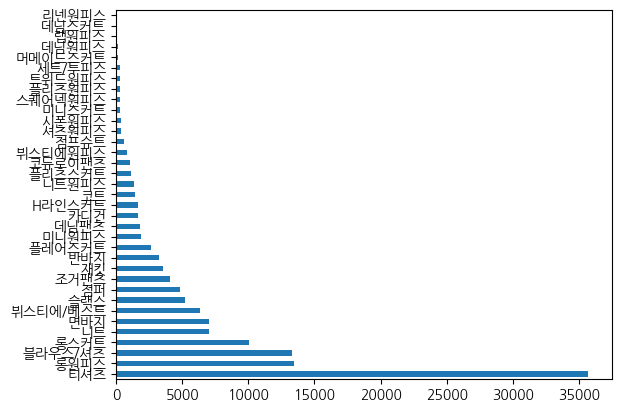

In [ ]:
fall_df['category_small_desc'].value_counts().plot.barh();

#패션데이터와 날씨 데이터 상관관계

상관관계 계산

In [ ]:
correlation_matrix = fall_df.corr()

print(correlation_matrix['recent_sale_count'])

sale_price          -0.043025
recent_sale_count    1.000000
최고기온                -0.020856
최저기온                -0.018507
평균기온                -0.018748
강수량                 -0.005501
습도                  -0.004608
적설                        NaN
체감온도                -0.018682
Name: recent_sale_count, dtype: float64


#상품 판매량과 기온의 관계

###1. 소분류별 상품 판매량과 기온의 상관관계

1) .groupby

In [ ]:
fall_df_group1 = fall_df.groupby(['Time','category_small_desc','평균기온'])['recent_sale_count'].count()

fall_df_group1.head(50)

Time        category_small_desc  평균기온 
2023-09-06  H라인스커트               25.99     125
            니트                   25.99     574
            니트원피스                25.99      65
            데님스커트                25.99       8
            데님원피스                25.99      17
            데님팬츠                 25.99     159
            랩원피스                 25.99      11
            롱스커트                 25.99     824
            롱원피스                 25.99    1329
            리넨원피스                25.99      10
            머메이드스커트              25.99      10
            면바지                  25.99     487
            미니스커트                25.99      14
            미니원피스                25.99     205
            반바지                  25.99     423
            뷔스티에/베스트             25.99     291
            뷔스티에원피스              25.99      87
            블라우스/셔츠              25.99    1688
            세트/투피스               25.99      29
            셔츠원피스                25.99      55
            스퀘어넥원피스  

2) pivot_table

In [ ]:
df_pivot1 = pd.pivot_table(data = fall_df,
                            index = ['Time', '평균기온', '체감온도', 'category_small_desc'],
                            values = 'recent_sale_count',
                            aggfunc = 'count')

df_pivot1.head(50)

recent_sale_count
Time       평균기온  체감온도  category_small_desc                   
2023-09-06 25.99 28.16 H라인스커트                             125
                       니트                                 574
                       니트원피스                               65
                       데님스커트                                8
                       데님원피스                               17
                       데님팬츠                               159
                       랩원피스                                11
                       롱스커트                               824
                       롱원피스                              1329
                       리넨원피스                               10
                       머메이드스커트                             10
                       면바지                                487
                       미니스커트                               14
                       미니원피스                              205
                       반바지                                423
                       뷔스티에/베스트                           291
                       뷔스티에원피스                             87
                       블라우스/셔츠                           1688
                       세트/투피스                              29
                       셔츠원피스                               55
                       스퀘어넥원피스                             33
                       슬랙스                                388
                       시폰원피스                               52
                       재킷                                 284
                       점퍼                                 108
                       점프슈트                                82
                       조거팬츠                               190
                       카디건                                112
                       코듀로이팬츠                              11
                       코트                                  46
                       트위드원피스                              17
                       티셔츠                               2593
                       플레어스커트                             193
                       플리츠스커트                              76
                       플리츠원피스                              29
2023-09-13 23.59 25.61 H라인스커트                             157
                       니트                                 680
                       니트원피스                               97
                       데님스커트                               10
                       데님원피스                               26
                       데님팬츠                               172
                       랩원피스                                19
                       롱스커트                               986
                       롱원피스                              1574
                       리넨원피스                               13
                       머메이드스커트                             10
                       면바지                                586
                       미니스커트                               23
                       미니원피스                              241
                       반바지                                411

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##2. 막대그래프

1) 소분류별 판매량

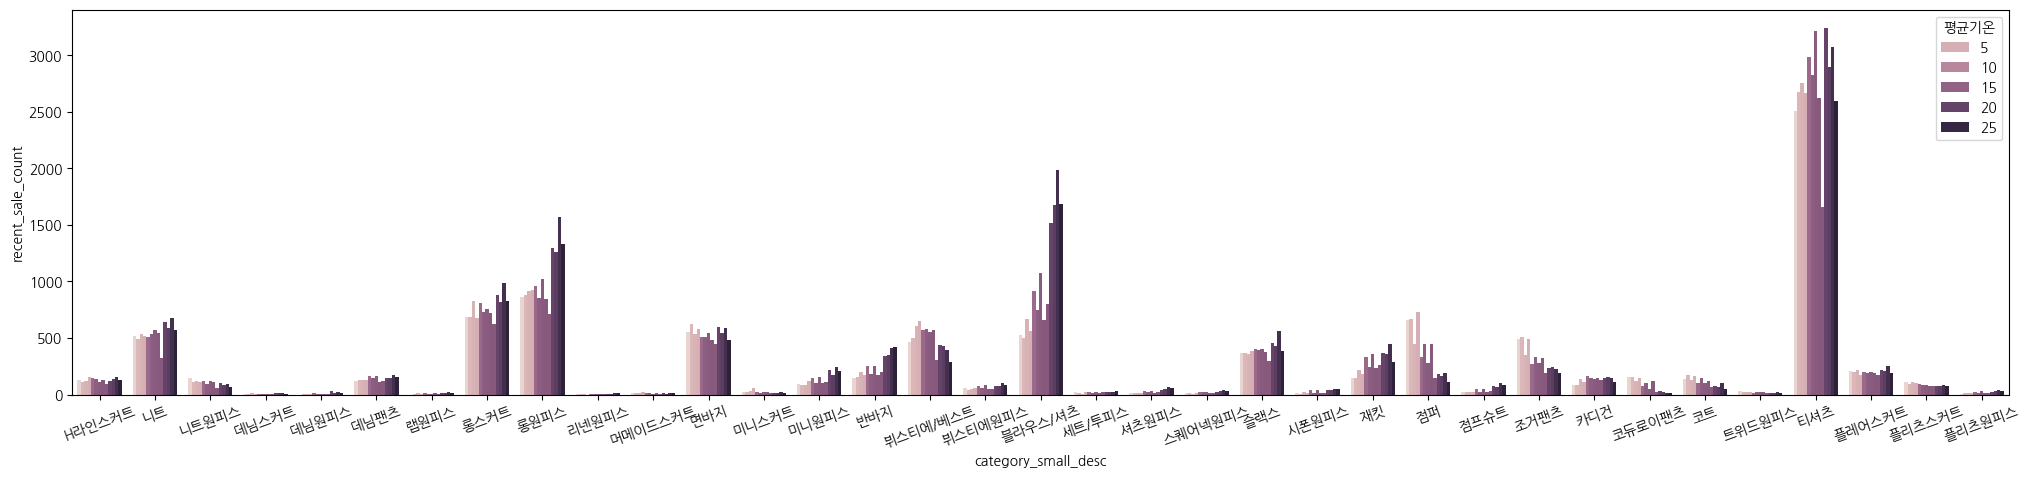

In [ ]:
plt.figure(figsize = (25, 5))
sns.barplot(data = df_pivot1,
            x = 'category_small_desc',
            y = 'recent_sale_count',
            hue = '평균기온')

plt.xticks(rotation = 20)
plt.show()

2) 소분류별 판매량 내림차순

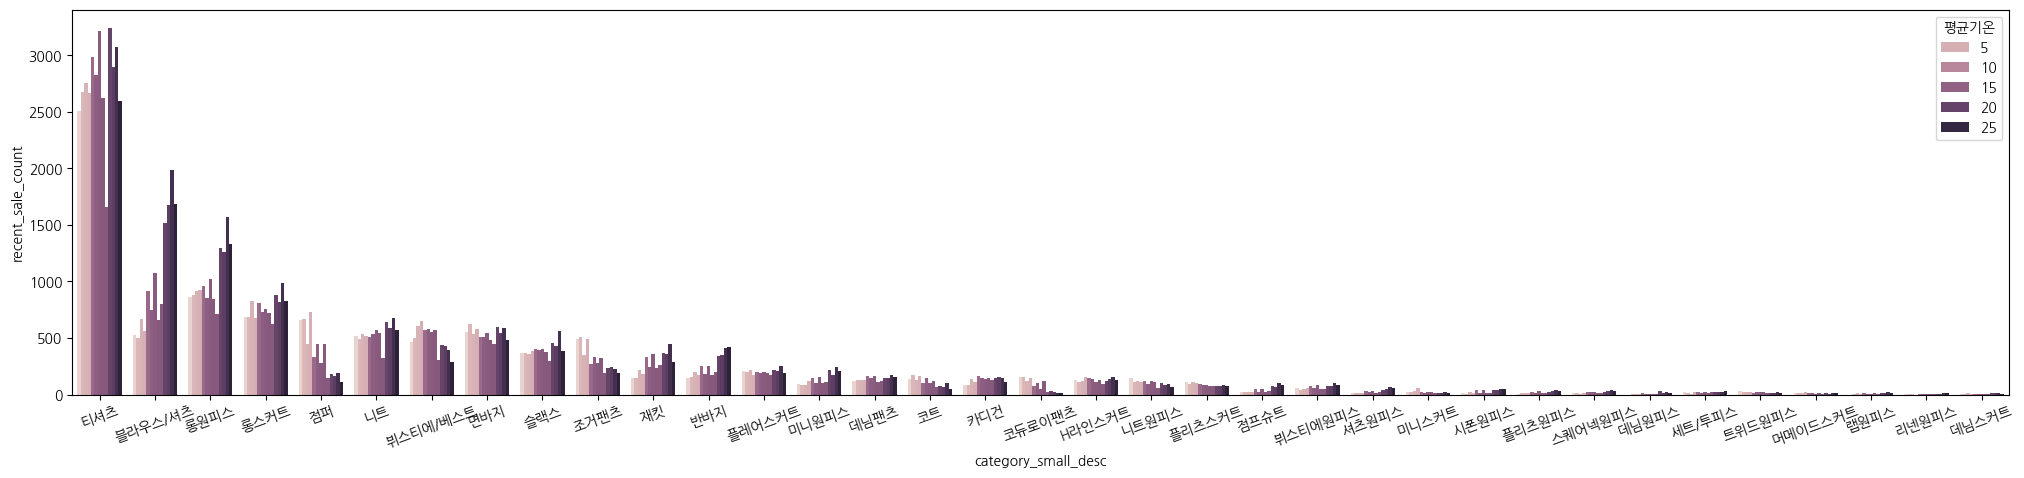

In [ ]:
plt.figure(figsize = (25, 5))
sns.barplot(data = df_pivot1.sort_values('recent_sale_count', ascending = False),
            x = 'category_small_desc',
            y = 'recent_sale_count',
            hue = '평균기온')
plt.xticks(rotation = 20)
plt.show()

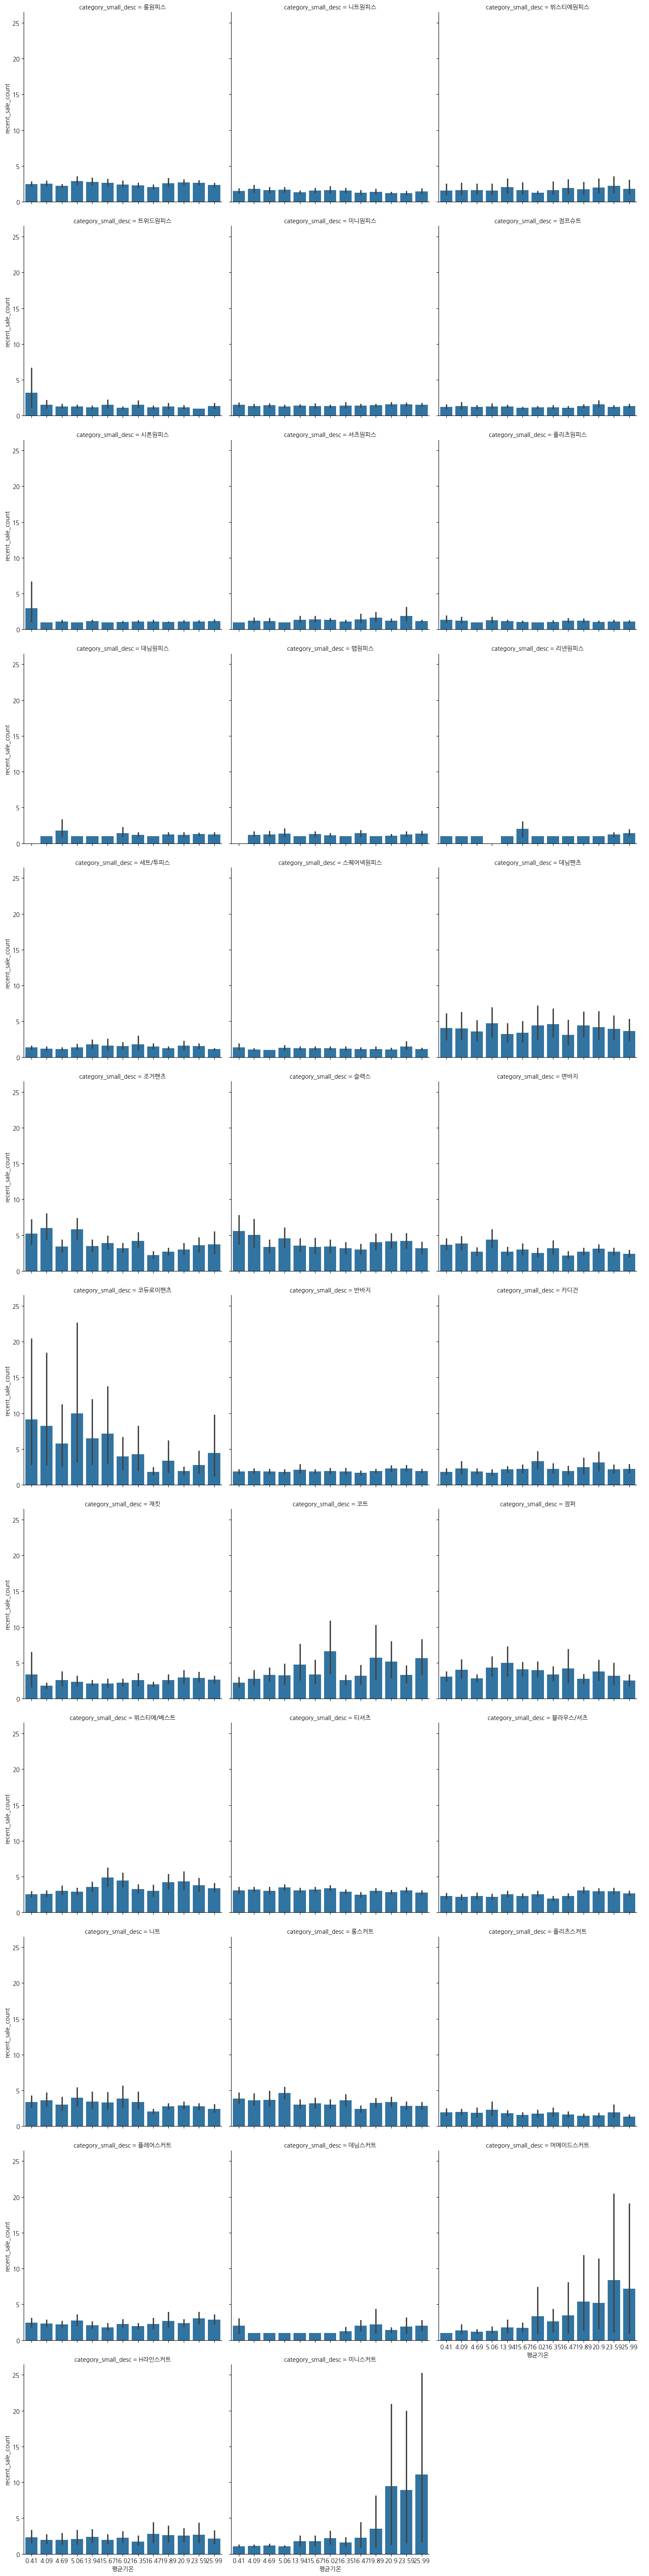

In [ ]:
sns.catplot(data = fall_df,
            x = '평균기온',
            y = 'recent_sale_count',
            kind = 'bar',
            col = 'category_small_desc',
            col_wrap = 3);

#상품 색상과 기온의 관계

1) pivot_table

In [ ]:
df_pivot_color = pd.pivot_table(data = fall_df,
                            index = ['Time', 'category_small_desc', '평균기온', '체감온도', 'color'],
                            values = 'recent_sale_count',
                            aggfunc = 'count')

df_pivot_color.head(50)

recent_sale_count
Time       category_small_desc 평균기온  체감온도  color                                            
2023-09-06 H라인스커트              25.99 28.16 그레이/민트                                          1
                                           그린/차콜/화이트                                       1
                                           그린/핑크/라이트핑크                                     1
                                           라이트핑크/민트/화이트/옐로우/블랙                             1
                                           레드/베이지                                          1
                                           베이지/브라운/화이트/차콜/그린/블랙                            1
                                           베이지/아이보리                                        3
                                           베이지/핑크/그레이/라이트블루/블랙/네이비/아이보리                    1
                                           베이지/핑크/민트/블루/블랙                                 1
                                           베이지/핑크/브라운/카키/화이트/라이트블루/블랙/네이비                  1
                                           베이지/핑크/화이트/그레이/블랙/네이비                           1
                                           베이지/핑크/화이트/그린/블랙                                1
                                           베이지/핑크/화이트/그린/블랙/아이보리                           1
                                           베이지/핑크/화이트/라이트블루/레드/블랙/네이비                      1
                                           베이지/화이트/그린/그레이/골드/실버                            1
                                           베이지/화이트/라이트블루/블루/블랙                             1
                                           베이지/화이트/차콜/라이트블루/아이보리                           1
                                           브라운/화이트/옐로우/레드/블랙                               1
                                           블랙                                              6
                                           블랙/그레이                                          5
                                           블랙/그레이/민트                                       1
                                           블랙/그린/그레이/화이트                                   1
                                           블랙/그린/베이지                                       1
                                           블랙/네이비                                          1
                                           블랙/네이비/베이지                                      1
                                           블랙/네이비/베이지/핑크                                   1
                                           블랙/네이비/아이보리/브라운                                 1
                                           블랙/라이트블루/브라운                                    1
                                           블랙/레드/퍼플/아이보리                                   1
                                           블랙/민트/핑크/브라운                                    1
                                           블랙/베이지                                          3
                                           블랙/베이지/브라운                                      1
                                           블랙/베이지/아이보리                                     2
                                           블랙/베이지/아이보리/민트                                  1
                                           블랙/베이지/핑크                                       1
                                           블랙/브라운                                          2
                                           블랙/블루                                           1
                                           블랙/블루/브라운                                       1
                                           블랙/실버                                           1
                                           블랙/아이보리                                         1
                                           블랙/아이보리/브라운                                     2
                                           블랙/와인/카키/브라운                     

In [ ]:
fall_df['color'].unique()

array(['블랙/베이지', '블랙/화이트', '블랙', ..., '블랙/화이트/그린/차콜/아이보리',
       '베이지/블랙/레드/화이트/아이보리', '핑크/그린/차콜/아이보리/블루'], dtype=object)

색상 고유값

In [ ]:
fall_df_color = fall_df['color'].str.split('/', expand=True)
fall_df_color

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Time,,,,,,,,,,,,,,,,,,,,
2023-09-06,블랙,베이지,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-09-06,블랙,화이트,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-09-06,블랙,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-09-06,블랙,네이비,베이지,화이트,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-09-06,블랙,베이지,아이보리,브라운,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,아이보리,블랙,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-11-29,핑크,라이트블루,블랙,화이트,그린,아이보리,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2023-11-29,핑크,그린,차콜,아이보리,블루,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
fall_df_color = fall_df_color.replace("'", ",").replace(" ", ",").replace("/", ",")

In [ ]:
flattened_fall_df = fall_df_color.values.flatten()
flattened_fall_df

array(['블랙', '베이지', None, ..., None, None, None], dtype=object)

.unique()

In [ ]:
non_none_values = [value for value in flattened_fall_df if value is not None]
unique_values = set(non_none_values)
print(unique_values)

{'카키', '네온', '아이보리', '핑크', '라이트블루', '오렌지', '그레이', '실버', '블루', '브라운', '그린', '와인', '라벤더', '블랙', '차콜', '퍼플', '베이지', '네이비', '레드', '민트', '라이트핑크', '골드', '옐로우', '화이트'}


In [ ]:
df_pivot_color

#상품 소재과 기온의 관계

###1. 소분류별 소재와 기온의 상관관계

1) pivot_table

In [ ]:
df_pivot_material = pd.pivot_table(data = fall_df,
                            index = ['Time', 'category_small_desc', '평균기온', '체감온도', 'material'],
                            values = 'recent_sale_count',
                            aggfunc = 'count')

df_pivot_material.head(50)

recent_sale_count
Time       category_small_desc 평균기온  체감온도  material                             
2023-09-06 H라인스커트              25.99 28.16 나일론                                 1
                                           나일론/레이온                             1
                                           나일론/스판                              1
                                           나일론/폴리에스터/스판                        1
                                           레더                                  7
                                           레더/폴리에스터                            1
                                           리넨                                  3
                                           새틴                                  1
                                           스판                                  1
                                           스판/기모/코튼                            1
                                           스판/코튼                               8
                                           스판/폴리에스터                           20
                                           스판/폴리에스터/코튼                         2
                                           실크/스판/레이온                           1
                                           실크/스판/레이온/코튼                        1
                                           실크/스판/레이온/폴리에스터                     6
                                           실크/스판/폴리에스터/레이온/코튼                  1
                                           실크/울/폴리에스터/레이온/텐셀                   1
                                           울/폴리에스터                             1
                                           코튼                                 29
                                           코튼/리넨                               4
                                           코튼/폴리에스터                            2
                                           폴리에스터                              31
           니트                  25.99 28.16 나일론                                 5
                                           나일론/니트                              1
                                           나일론/레이온                            13
                                           나일론/레이온/울/폴리에스터                     1
                                           나일론/레이온/폴리에스터                      18
                                           나일론/리넨/레이온                          1
                                           나일론/리넨/폴리에스터                        1
                                           나일론/스판/코튼                           1
                                           나일론/아크릴                             8
                                           나일론/아크릴/울                           7
                                           나일론/아크릴/울/폴리에스터                     3
                                           나일론/아크릴/폴리에스터                      10
                                           나일론/아크릴/폴리에스터/스판                    1
                                           나일론/울                              26
                                           나일론/울/텐셀                            1
                                           나일론/울/폴리에스터                        14
                                           나일론/코튼                              2
                                           나일론/퍼/울/폴리에스터                       1
                                           나일론/폴리에스터                          15
                                           나일론/폴리에스터/스판                        1
                                           나일론/폴리에스터/울/스판                      8
                                           나일론/폴리에스터/코튼                        1
                                           레더/아크릴                              1
                                           레이온                                 2
                                           레이온/울/폴리에스터                         2
             

#상품 가격과 판매의 관계

###1. 소분류별 가격와 판매량의 상관관계

In [ ]:
df_pivot_sale_price = pd.pivot_table(data = fall_df,
                            index = ['Time', 'category_small_desc', 'sale_price'],
                            values = 'recent_sale_count',
                            aggfunc = 'count')

df_pivot_sale_price.head(50)

recent_sale_count
Time       category_small_desc sale_price                   
2023-09-06 H라인스커트              7900                        1
                               8000                        1
                               8900                        1
                               12900                       1
                               15800                       1
                               15900                       1
                               16800                       1
                               17000                       1
                               17200                       1
                               17800                       1
                               17900                       2
                               18100                       1
                               18900                       2
                               19000                       1
                               19800                       1
                               19900                       3
                               21800                       4
                               21900                       1
                               22000                       1
                               22800                       2
                               22900                       1
                               23500                       2
                               23800                       3
                               23900                       3
                               24000                       1
                               24500                       2
                               24800                       1
                               24900                       2
                               25000                       3
                               25900                       3
                               26000                       1
                               26400                       1
                               26800                       2
                               26820                       1
                               26900                       1
                               27160                       1
                               27200                       1
                               27500                       1
                               27800                       2
                               28500                       1
                               28900                       1
                               29000                       1
                               29700                       1
                               29800                       1
                               29900                       4
                               30500                       1
                               31000                       1
                               31800                       1
                               32030                       1
                               32300                       1